In [2]:
import pandas as pd

df=pd.read_csv('d:/data/ozone/ozone.csv')
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day,Ozone2
0,41.0,190.0,7.4,67,5,1,41.00000
1,36.0,118.0,8.0,72,5,2,36.00000
2,12.0,149.0,12.6,74,5,3,12.00000
3,18.0,313.0,11.5,62,5,4,18.00000
4,NaN,NaN,14.3,56,5,5,42.12931


<AxesSubplot:>

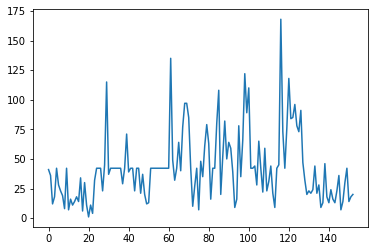

In [3]:
df['Ozone2'].plot()

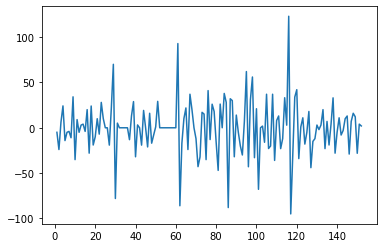

In [4]:
import matplotlib.pyplot as plt

diff1=df['Ozone2'].diff(periods=1).iloc[1:] # 1차 차분 데이터
diff1.plot()
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
# 로그 취한 후 차분한 자료를 adfuller 함수로 안정적인 시계열인지 확인
diff1=np.log(df['Ozone2']).diff(periods=1).iloc[1:]
result=adfuller(diff1)
print(result)
print('ADF Statisitc : %f' % result[0])
print('p-value : %f' % result[1])
# p-value가 0.05보다 작으므로 95% 신뢰수준 하에서 유의함(안정적인 시계열 자료임)

(-9.189875590807725, 2.1375829069820617e-15, 3, 148, {'1%': -3.4753253063120644, '5%': -2.881274703275226, '10%': -2.5772928360116873}, 289.55299349906795)
ADF Statisitc : -9.189876
p-value : 0.000000


In [6]:
from pmdarima.arima import auto_arima
model=auto_arima(df['Ozone2'], suppress_warnings=True)
model
# 가장 적절한 모형은 arima(1,0,1)

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True)

In [7]:
# 학습용, 검증용 구분
n=int(df.shape[0]*.8)
train=df[:n]
test=df[n:]
print(len(df['Ozone2']))
print(train['Ozone2'].values)
print(test['Ozone2'].values)

153
[ 41.          36.          12.          18.          42.12931034
  28.          23.          19.           8.          42.12931034
   7.          16.          11.          14.          18.
  14.          34.           6.          30.          11.
   1.          11.           4.          32.          42.12931034
  42.12931034  42.12931034  23.          45.         115.
  37.          42.12931034  42.12931034  42.12931034  42.12931034
  42.12931034  42.12931034  29.          42.12931034  71.
  39.          42.12931034  42.12931034  23.          42.12931034
  42.12931034  21.          37.          20.          12.
  13.          42.12931034  42.12931034  42.12931034  42.12931034
  42.12931034  42.12931034  42.12931034  42.12931034  42.12931034
  42.12931034 135.          49.          32.          42.12931034
  64.          40.          77.          97.          97.
  85.          42.12931034  10.          27.          42.12931034
   7.          48.          35.          61.          

In [8]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(train['Ozone2'], order=(1,0,1)).fit()

In [9]:
fore=model.forecast(steps=5) # 예측값
print(fore)
# 예측값, stderr, upper bound, lower bound

(array([68.40823783, 61.06896288, 56.0140277 , 52.53243452, 50.13448268]), array([26.39598986, 27.87511339, 28.54999188, 28.86462206, 29.01268263]), array([[ 1.66730484e+01,  1.20143427e+02],
       [ 6.43474456e+00,  1.15703181e+02],
       [ 5.70718512e-02,  1.11970984e+02],
       [-4.04118515e+00,  1.09106054e+02],
       [-6.72933036e+00,  1.06998296e+02]]))


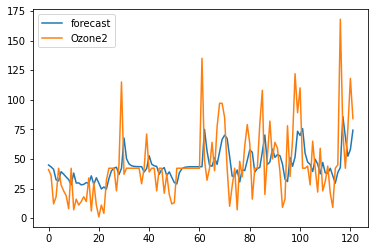

In [10]:
model.plot_predict() # 실제값과 예측값
plt.show()

[85.         96.         78.         73.         91.         47.
 32.         20.         23.         21.         24.         44.
 21.         28.          9.         13.         46.         18.
 13.         24.         16.         13.         23.         36.
  7.         14.         30.         42.12931034 14.         18.
 20.        ]
[68.40823783 61.06896288 56.0140277  52.53243452 50.13448268 48.48289023
 47.34535379 46.56187408 46.02225141 45.65058559 45.39460028 45.21829006
 45.09685616 45.01321841 44.9556128  44.91593686 44.88861001 44.8697886
 44.85682533 44.84789687 44.84174737 44.8375119  44.83459471 44.8325855
 44.83120165 44.83024852 44.82959205 44.82913991 44.82882849 44.828614
 44.82846628]


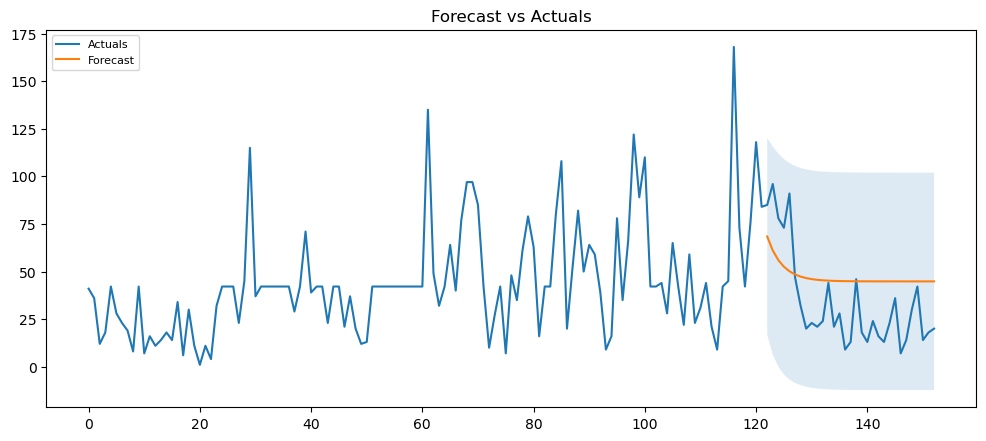

In [11]:
# 예측값, standard error, uppper bound/lower bound
fc, se, conf=model.forecast(steps=len(test))
print(test['Ozone2'].values)
print(fc)
fc_series=pd.Series(fc, index=test.index)
lower=pd.Series(conf[:,0], index=test.index)
upper=pd.Series(conf[:,1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(df['Ozone2'], label='Actuals')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower.index, lower, upper, alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()